In [3]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import time
import numpy as np
import pandas as pd
import jieba
import matplotlib.cm as cm
import json
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
with open("movie_all_info.json") as movie:
  movie_info=json.load(movie) 
with open("stopword.txt","r",encoding="utf8") as f:
  stopword=f.read()
  


In [6]:
my_list=[]
for i in range(len(movie_info)):
  my_list.append(movie_info[i]["intro"])
  

In [7]:
tfidf = TfidfVectorizer()
text = tfidf.fit_transform(my_list)


In [8]:
print(text)

  (0, 13452)	0.14313034437466243
  (0, 66793)	0.14313034437466243
  (0, 77762)	0.14313034437466243
  (0, 57876)	0.14313034437466243
  (0, 189600)	0.13687583908327894
  (0, 201630)	0.14313034437466243
  (0, 57788)	0.14313034437466243
  (0, 170639)	0.14313034437466243
  (0, 132512)	0.12899609430887443
  (0, 202872)	0.14313034437466243
  (0, 138716)	0.14313034437466243
  (0, 177461)	0.14313034437466243
  (0, 58472)	0.14313034437466243
  (0, 110375)	0.14313034437466243
  (0, 53383)	0.12618369166584142
  (0, 46749)	0.14313034437466243
  (0, 37187)	0.14313034437466243
  (0, 35429)	0.14313034437466243
  (0, 169002)	0.14313034437466243
  (0, 148847)	0.14313034437466243
  (0, 29705)	0.13687583908327894
  (0, 139418)	0.14313034437466243
  (0, 196888)	0.14313034437466243
  (0, 130452)	0.14313034437466243
  (0, 178140)	0.14313034437466243
  :	:
  (7877, 191020)	0.20000000000000007
  (7877, 105044)	0.20000000000000007
  (7877, 218599)	0.20000000000000007
  (7877, 110176)	0.20000000000000007
  (7877

# **KNN**

In [9]:

kmeans = KMeans(n_clusters=10,random_state=42,max_iter=100,).fit(text).fit_predict(text)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:

clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


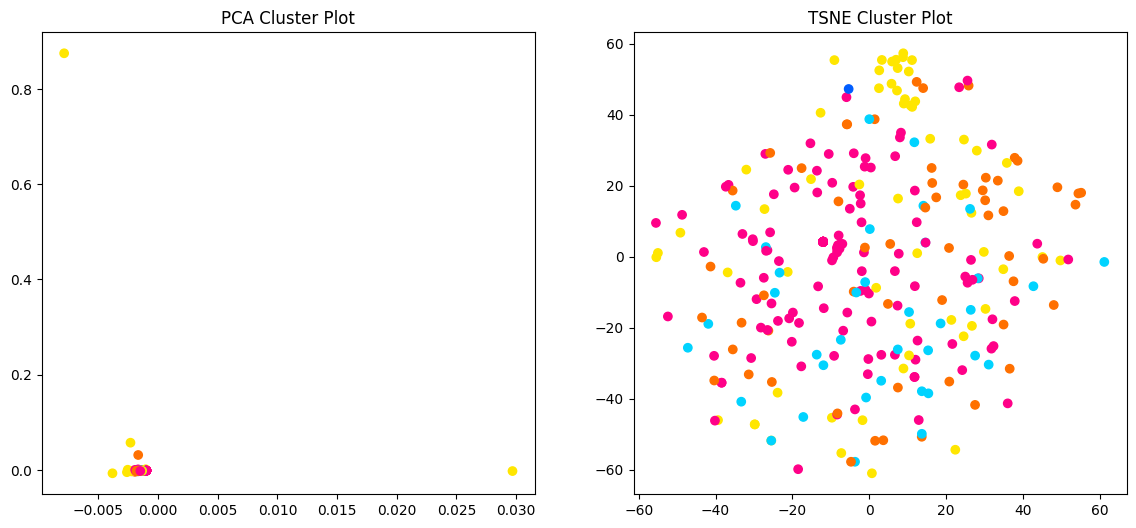

In [11]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].toarray())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].toarray()))
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

# **SVN**

In [30]:
train_data=[]
for i in range(len(movie_info)):
  train_data.append(movie_info[i]["intro"])


In [13]:
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval=train_test_split(my_list,clusters,random_state=87, test_size=0.1)

In [14]:
from sklearn.svm import SVC
xtrain_tfidf=tfidf.fit_transform(xtrain)
svm_clf=SVC()
svm_clf.fit(xtrain_tfidf,ytrain)

SVC()

In [31]:

value=tfidf.transform(train_data)
y=svm_clf.predict(value)

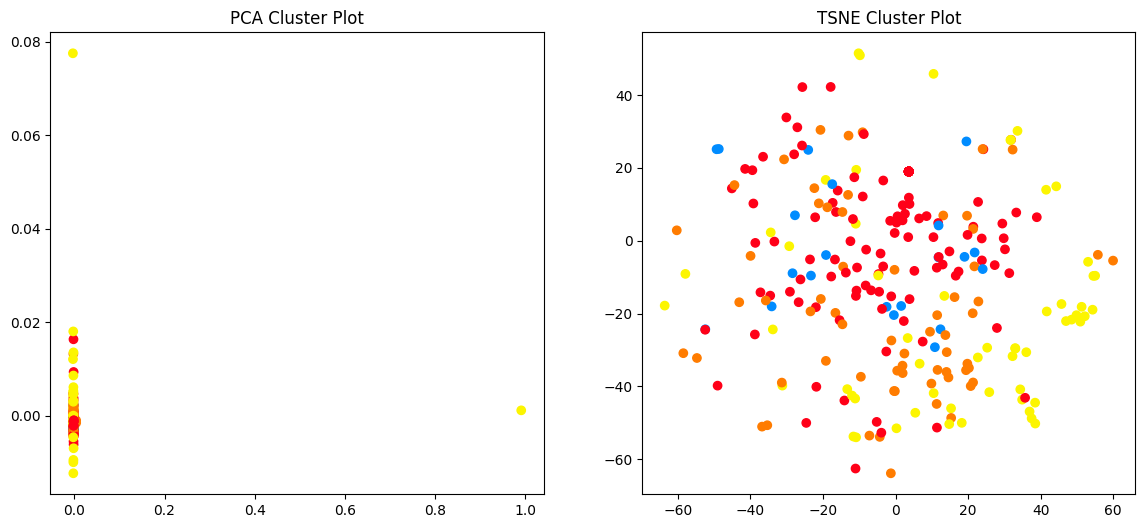

In [32]:
# plt.subplot(233)
# X0, X1 = xval_tfidf[:, 0], xval_tfidf[:, 1]
plot_tsne_pca(text, y)